In [1]:
#K-Fold cross validation

In [2]:
# In K-Fold cross validation we split data set into K number of folds(subset).One chunk of data is
# used as test data for evaluation & remainning part of the data 
# is used as training of model .Each time a different chunk will be used to test data

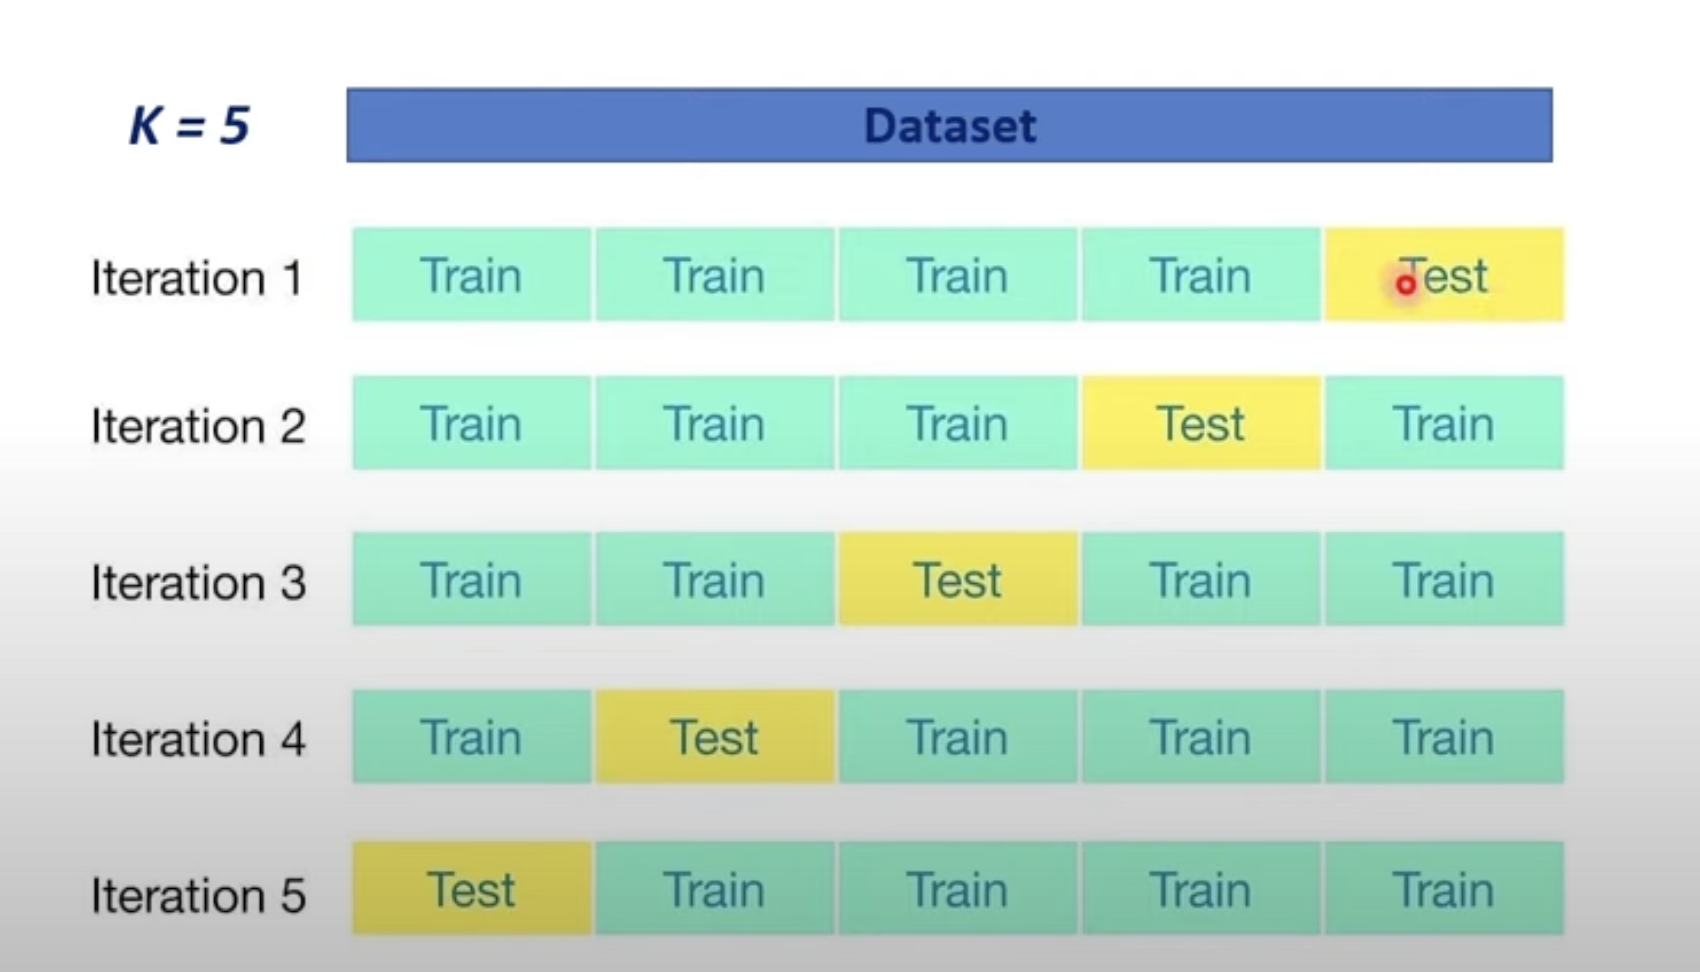

In [3]:
#Adv : if data set is small , if it is large go for train-test split because of long time due to no.of fold
#Better for multiclass folding
#better score
#Model selection

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [21]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_data.shape

(303, 14)

In [9]:
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [10]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=3)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=3)

In [13]:
#cross validation

In [ ]:
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [14]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), X, Y, cv=5)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
82.83


In [15]:
cv_score_svc = cross_val_score(SVC(kernel='linear'), X, Y, cv=5)

print(cv_score_svc)

mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)

mean_accuracy_svc = mean_accuracy_svc*100

mean_accuracy_svc = round(mean_accuracy_svc, 2)

print(mean_accuracy_svc)

[0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
82.83


In [17]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X,Y, cv=5)# 5 fold
    
    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')


In [18]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=1000) =   [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Accuracy % of the  LogisticRegression(max_iter=1000) 82.83
----------------------------------------------
Cross Validation accuracies for  SVC(kernel='linear') =   [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy % of the  SVC(kernel='linear') 82.83
----------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier() =   [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy % of the  KNeighborsClassifier() 64.39
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [0.83606557 0.90163934 0.83606557 0.8        0.76666667]
Accuracy % of the  RandomForestClassifier() 82.81
----------------------------------------------


In [19]:
def compare_models_train_test():
  for model in models:
    # training the model
    model.fit(X_train, Y_train)
    # evaluating the model
    test_data_prediction = model.predict(X_test)
    accuracy = accuracy_score(Y_test, test_data_prediction)
    print('Accuracy score of the ', model, ' = ', accuracy)


In [20]:
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=1000)  =  0.7704918032786885
Accuracy score of the  SVC(kernel='linear')  =  0.7704918032786885
Accuracy score of the  KNeighborsClassifier()  =  0.6557377049180327
Accuracy score of the  RandomForestClassifier()  =  0.7704918032786885
